In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = np.loadtxt('../data/waypoints.txt')

In [4]:
def create_pose(xp, yp, theta):
    
    ct = np.cos(theta)
    st = np.sin(theta)
    
    pose = np.array([[ct, -st, xp], [st, ct, yp], [0, 0, 1]])
    
    return pose


def invert_pose(pose):
    return np.linalg.inv(pose)


def invert_pose_analytical(pose):
    
    ct = pose[0, 0]
    st = pose[1, 0]
    
    xp = pose[0, 2]
    yp = pose[1, 2]
    
    pose_inv = np.array([[ct, st, -(xp*ct + yp*st)], [-st, ct, xp*st - yp*ct], [0, 0, 1]])
    
    return pose_inv


def transform_points(points, pose):
    
    res = []
    
    for i in range(len(points)):
        
        pt = points[i, :]
        pt_h = np.array([pt[0], pt[1], 1])
        pt_t = np.dot(pose, pt_h)
        
        transformed = np.array([pt_t[0] / pt_t[2], pt_t[1] / pt_t[2]])
        
        res.append(transformed)
        
    return np.array(res)
    

In [5]:
car_x = -40.62
car_y = 108.73
car_psi = 3.733651

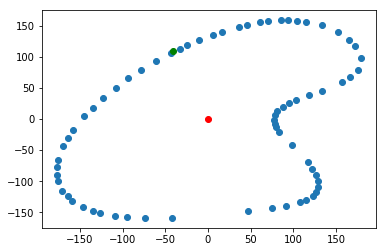

In [6]:
plt.plot(data[:, 0], data[:, 1], 'o')
plt.plot(0, 0, 'ro')
plt.plot(car_x, car_y, 'go')

In [7]:
car_pose_in_map = create_pose(car_x, car_y, car_psi) 

In [8]:
def plot_t(data, car_pose_in_map, invert_pose_func):
    
    t_map_to_car = invert_pose_func(car_pose_in_map)
    points_c = transform_points(data, t_map_to_car)

    plt.plot(points_c[:, 0], points_c[:, 1], 'o')
    plt.plot(0, 0, 'ro')

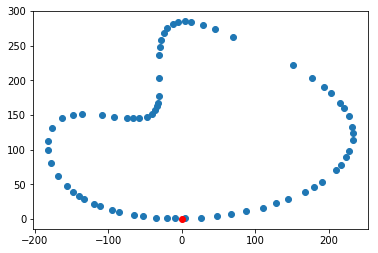

In [9]:
plot_t(data, car_pose_in_map, invert_pose)

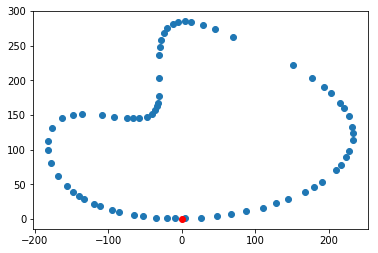

In [10]:
plot_t(data, car_pose_in_map, invert_pose_analytical)